In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [6]:
bcan=load_breast_cancer()

In [7]:
bcan.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(bcan["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
df=pd.DataFrame(bcan["data"],columns=bcan["feature_names"])

In [20]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [24]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [26]:
#Appling the standard scaler or min max scaler to change the data into standard normal distribution

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
stds=StandardScaler()
stds.fit(df)

StandardScaler()

In [31]:
scaled=stds.transform(df)

In [32]:
#Appling the PCA technique

In [34]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [38]:
scaled.shape

(569, 30)

In [41]:
scaled_pca=pca.transform(scaled)

In [42]:
scaled_pca.shape

(569, 2)

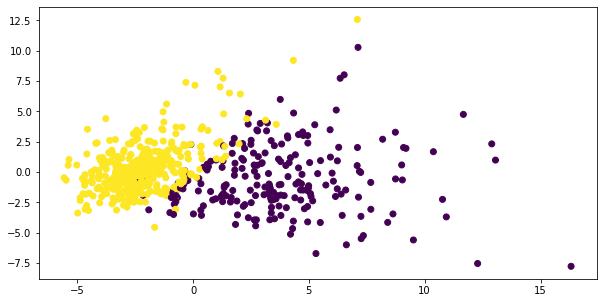

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(scaled_pca[:,0],scaled_pca[:,1],c=bcan["target"])

In [53]:
#To check how each feature is related to the target varable

In [57]:
pca.components_.shape

(2, 30)

In [112]:
pca_comp=pd.DataFrame(pca.components_,columns=bcan["feature_names"])

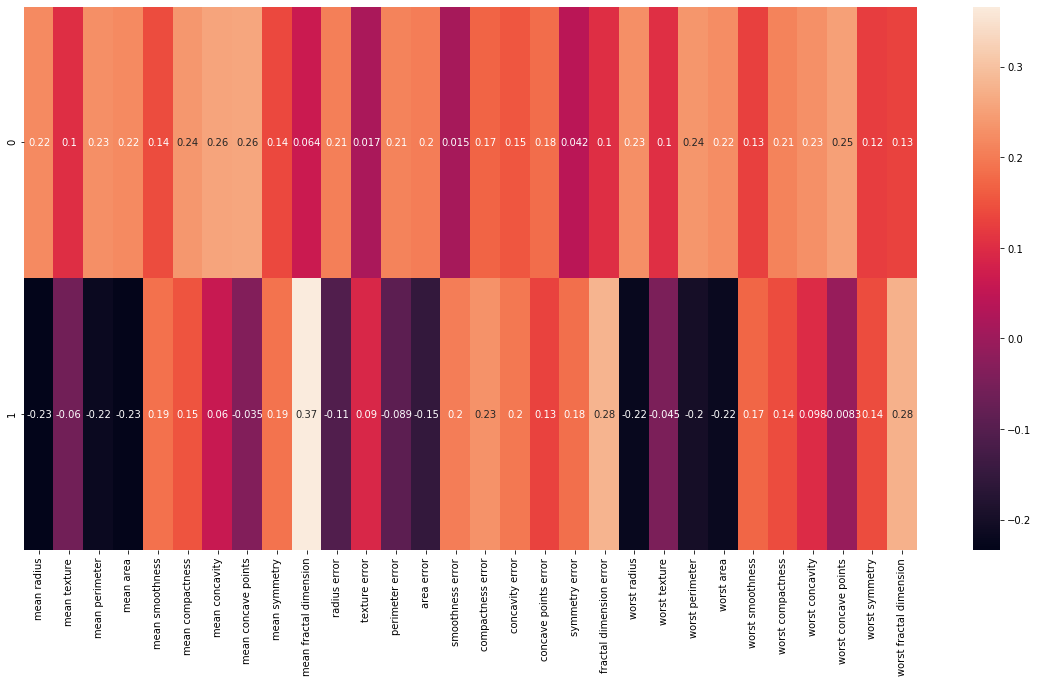

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(pca_comp,annot=True)

In [63]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(scaled_pca,bcan["target"],test_size=0.3)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [154]:
y_pred=classifier.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [156]:
accuracy=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [157]:
print(accuracy)
print(matrix)
print(report)

0.9532163742690059
[[ 59   5]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [94]:
from sklearn.model_selection import cross_val_score

In [169]:
score=cross_val_score(classifier,scaled_pca,bcan["target"],cv=10)
np.mean(score)

0.9157268170426065

In [ ]:
#PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, 
#PCA does not work well to reduce data. Refer to the correlation matrix to determine. 
#In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

In [144]:
dt=pd.DataFrame(bcan["target"],columns=["output"])

In [149]:
ft=pd.concat([df,dt],axis=1)

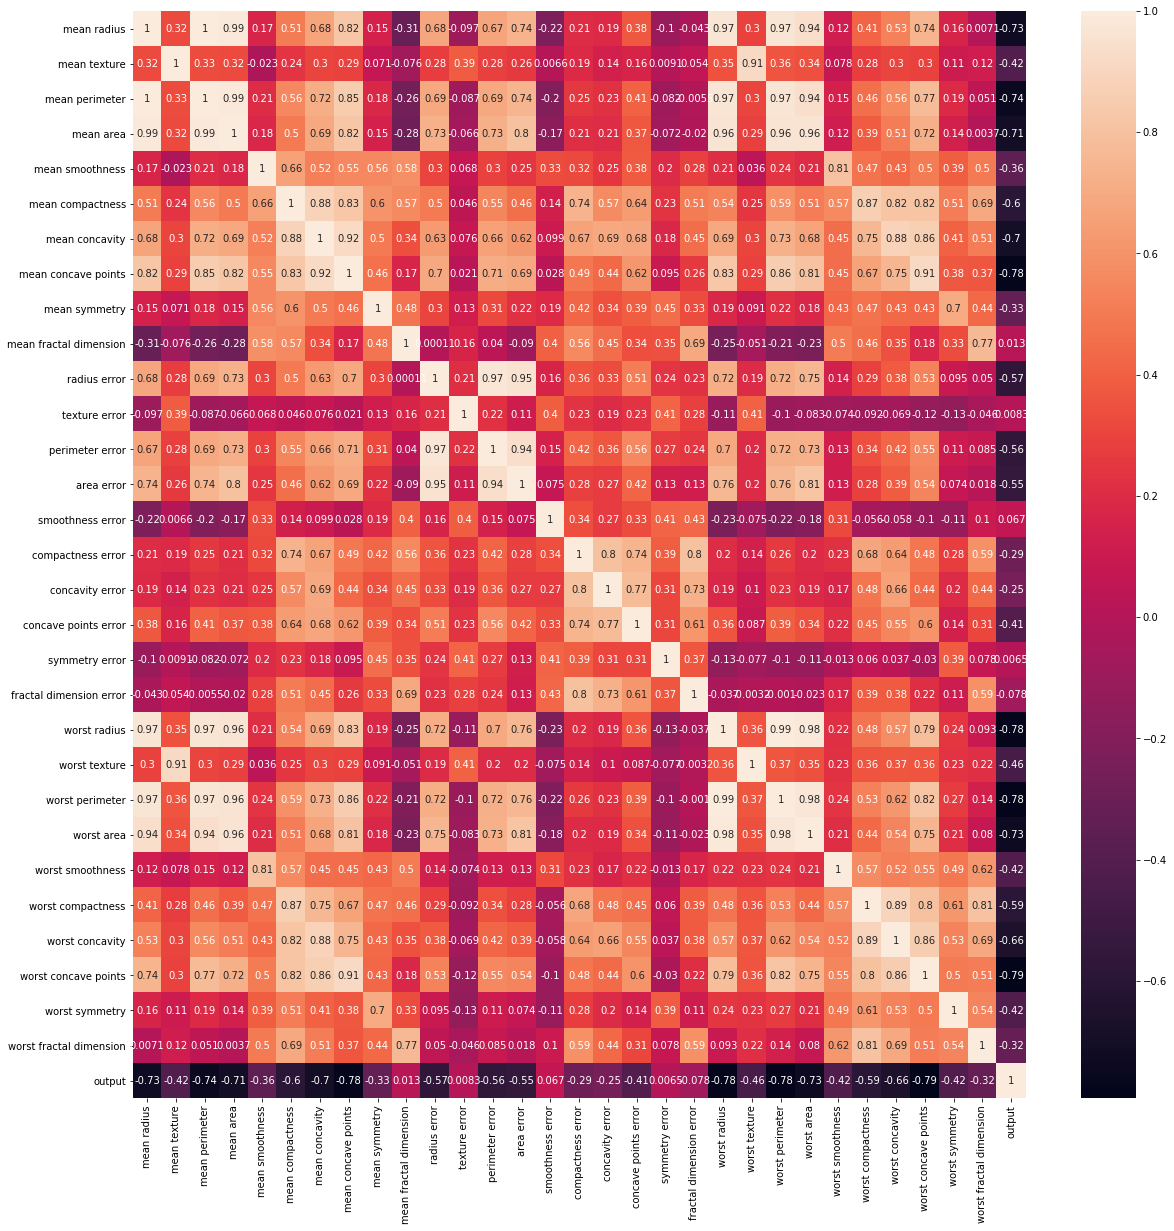

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(ft.corr(),annot=True)

In [151]:
#From the corr matrix we can say we can apply PCA as most of the correlations are more than -0.3.